In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

## EDA

### Dataset basic info

In [5]:
boston_df = load_boston()

In [10]:
boston_df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [12]:
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
boston_df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
df = pd.DataFrame(boston_df.data, columns = boston_df.feature_names)
df['Price'] = boston_df.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [22]:
# percentage of zeros
df.astype(bool).sum(axis=0)

CRIM       506
ZN         134
INDUS      506
CHAS        35
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

### Feature exploration

In [29]:
df_corr = df.corr()

In [30]:
df_corr.Price

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [31]:
df_corr.where(df_corr>0.3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,NaN,0.406583,NaN,0.420972,NaN,0.352734,NaN,0.625505,0.582764,NaN,NaN,0.455621,NaN
ZN,NaN,1.000000,NaN,NaN,NaN,0.311991,NaN,0.664408,NaN,NaN,NaN,NaN,NaN,0.360445
INDUS,0.406583,NaN,1.000000,NaN,0.763651,NaN,0.644779,NaN,0.595129,0.720760,0.383248,NaN,0.603800,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.420972,NaN,0.763651,NaN,1.000000,NaN,0.731470,NaN,0.611441,0.668023,NaN,NaN,0.590879,NaN
RM,NaN,0.311991,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.695360
AGE,0.352734,NaN,0.644779,NaN,0.731470,NaN,1.000000,NaN,0.456022,0.506456,NaN,NaN,0.602339,NaN
DIS,NaN,0.664408,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
RAD,0.625505,NaN,0.595129,NaN,0.611441,NaN,0.456022,NaN,1.000000,0.910228,0.464741,NaN,0.488676,NaN
TAX,0.582764,NaN,0.720760,NaN,0.668023,NaN,0.506456,NaN,0.910228,1.000000,0.460853,NaN,0.543993,NaN


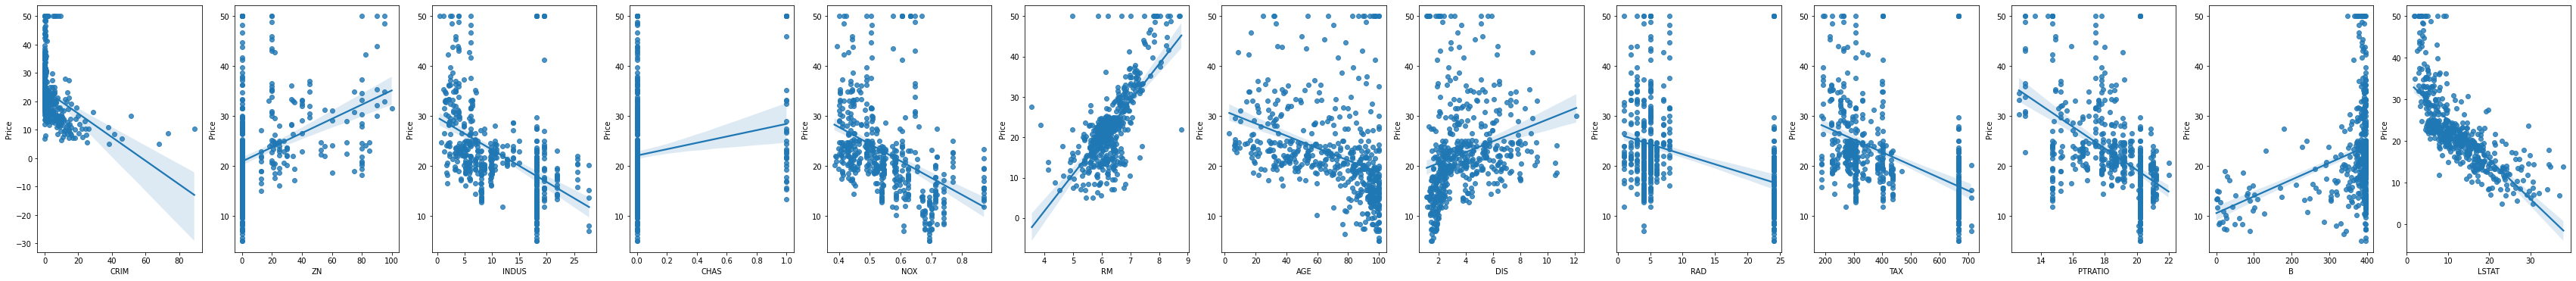

In [42]:
df_feat = df.drop(['Price'], axis = 1)
fig, axs = plt.subplots(ncols=len(df_feat.columns))
fig.set_figheight(6)
fig.set_figwidth(60)
for i, col in enumerate(df_feat.columns):
    sns.regplot(x = col, y = 'Price', data = df, ax = axs[i])

## Model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [78]:
# train/test split
X = df_feat
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [79]:
# feature scaling
# how to deal with categorical data in scaling?
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model comparison

1. Model comparison
2. Parameter tuning
3. Model ensembling
4. Cross-validation
5. Regression model evaluation
6. Feature selection

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [80]:
scoring = ['neg_mean_squared_error', 'r2']
reg_model = LinearRegression()
kf5 = KFold(n_splits=5, shuffle=False)
scores = cross_validate(reg_model, X_train, y_train, scoring = scoring, cv = kf5)
scores

{'fit_time': array([0.0030005 , 0.00201964, 0.00194931, 0.00099492, 0.00107694]),
 'score_time': array([0.00100064, 0.        , 0.        , 0.00100112, 0.        ]),
 'test_neg_mean_squared_error': array([-22.54184168, -22.35644211, -25.05091871, -24.6863357 ,
        -22.80070177]),
 'test_r2': array([0.68798492, 0.74637974, 0.68388173, 0.72268768, 0.76941745])}

In [82]:
reg_model.fit(X_train, y_train)
dict(zip(X.columns, reg_model.coef_))


{'CRIM': -0.943951505220244,
 'ZN': 1.0158939887434342,
 'INDUS': 0.05636324559389372,
 'CHAS': 0.5623190486230808,
 'NOX': -2.103784542930435,
 'RM': 2.698276880135367,
 'AGE': -0.026293980685375362,
 'DIS': -3.1582152747911723,
 'RAD': 2.6393367581316625,
 'TAX': -2.0617017579622074,
 'PTRATIO': -2.164407937704289,
 'B': 0.729689709616198,
 'LSTAT': -3.765947229464132}

In [83]:
y_pred = reg_model.predict(X_test)

In [84]:
residule = y_test - y_pred

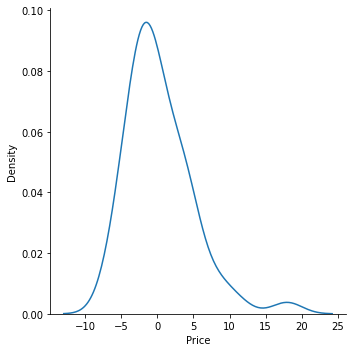

In [85]:
sns.displot(residule, kind = 'kde')

In [69]:
def adjust_R2(y_true, y_pred):
    y_bar = np.mean(y_true)
    ss_total = np.sum((y_true - y_bar)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    ss_explain = np.sum((y_pred - y_bar)**2)
    R2 = ss_explain/ss_total
    R2_adj = 1 - ((1 - R2) * (len(y_pred) - 1) / (len(y_pred) - i - 1))
    return R2, R2_adj

In [86]:
adjust_R2(y_pred, y_test)

(0.9105599775983908, 0.8823157599978826)

In [87]:
r2_score(y_test, y_pred)

0.714125825268598

In [89]:
mean_squared_error(y_test, y_pred)

20.578623342066766

In [ ]:
# transform new data by the same training pipeline

## Picking the model file for deployment

In [91]:
import pickle


In [ ]:
pickle.dump(reg_model, open('regmodel.pkl', 'wb'))

In [93]:
pickle_model = pickle.load(open('regmodel.pkl', 'rb'))

In [96]:
# predict the house price
pickle_model.predict(scaler.transform(boston_df.data[0].reshape(1, -1)))[0]

E:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


30.231260731367367